In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def sigmoid(x):
    if x.ndim > 1:
        return np.array([sigmoid(x_row) for x_row in x])
    return 1. / (1. + np.exp(-x))

In [3]:
def softmax(x):
    if x.ndim > 2:
        return np.array([softmax(x_row) for x_row in x])
    x_max = np.max(x)
    x_offset = x - x_max
    ex = np.exp(x_offset)
    if ex.ndim == 2:
        sum = np.sum(ex, axis=1)
        return (ex.T / sum).T
    return ex / np.sum(ex)

In [4]:
def gradient(f, x, epsilon=1e-6):
    g = np.zeros(x.shape, dtype='float')
    x_line = x.reshape(-1, order='c')
    g_line = g.reshape(-1, order='c')

    for i in range(len(x_line)):
        tmp = x_line[i]
        x_line[i] = x_line[i] + epsilon
        y_high = f(tmp + epsilon)
        x_line[i] = x_line[i] - epsilon
        y_low = f(tmp - epsilon)
        g_line[i] = (y_high - y_low) / (2 * epsilon)
        x_line[i] = tmp
    return g

In [5]:
def plot_decision_boundary(model, axis):
    x0, x1 = np.meshgrid(
        np.linspace(axis[0], axis[1], int((axis[1] - axis[0]) * 100)).reshape(-1, 1),
        np.linspace(axis[2], axis[3], int((axis[3] - axis[2]) * 100)).reshape(-1, 1)
    )
    X_new = np.c_[x0.ravel(), x1.ravel()]
    y_predict = model.predict(X_new)
    zz = y_predict.reshape(x0.shape)
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['#EF9A9A', '#FFF59D', '#90CAF9'])
    plt.contourf(x0, x1, zz, linewidth=5, cmap=custom_cmap)

In [16]:
class TwoLayerNet:

    def __init__(self, input_size, hidden_size, output_size, std_weight_init=1e-2):
        # 初始化param
        W1 = std_weight_init * np.random.randn(input_size, hidden_size)
        b1 = np.zeros(hidden_size)
        W2 = std_weight_init * np.random.randn(hidden_size, output_size)
        b2 = np.zeros(output_size)
        param = {}
        param['W1'], param['b1'], param['W2'], param['b2'] = W1, b1, W2, b2
        self.param = param

    def fit(self, X, y, max_iter=1.5e3, eta=1e-1):
        f = lambda w: self._loss(X, y)
        for iter in range(int(max_iter)):
            g_w1 = gradient(f, self.param['W1'])
            g_b1 = gradient(f, self.param['b1'])
            g_w2 = gradient(f, self.param['W2'])
            g_b2 = gradient(f, self.param['b2'])
            self.param['W1'] = self.param['W1'] - eta * g_w1
            self.param['b1'] = self.param['b1'] - eta * g_b1
            self.param['W2'] = self.param['W2'] - eta * g_w2
            self.param['b2'] = self.param['b2'] - eta * g_b2
            if iter % 100 == 0:
                loss_val = self._loss(X, y)
                print('iter=' + str(iter) + ',loss=' + str(loss_val))
        return self

    def _loss(self, X, y):
        p = self._predict(X)
        t = np.eye(p.shape[1], dtype='int')[y]
        return self._entropy(p, t)

    def _entropy(self, p, t):
        if p.ndim > 1:
            return np.sum([self._entropy(p_row, t_row) for p_row, t_row in zip(p, t)]) / len(p)
        return - t * np.log(p)

    def _predict(self, X):
        W1, b1 = self.param['W1'], self.param['b1']
        W2, b2 = self.param['W2'], self.param['b2']
        A1 = X.dot(W1) + b1
        Z1 = relu(A1)
        A2 = Z1.dot(W2) + b2
        Z2 = softmax(A2)
        return Z2

    def predict(self, X):

        W1, b1 = self.param['W1'], self.param['b1']
        W2, b2 = self.param['W2'], self.param['b2']
        A1 = X.dot(W1) + b1


        Z1 = relu(A1)
        A2 = Z1.dot(W2) + b2


        return np.argmax(A2, axis=1)

    def score(self, X, y):
        y_predict = self.predict(X)
        return np.sum(y_predict == y) / len(y)

In [9]:
def relu(x):
    return np.maximum(0,x)

iter=0,loss=0.6551841747735411
iter=100,loss=0.6033578681814533
iter=200,loss=0.6033535105651131
iter=300,loss=0.6033535079061051
iter=400,loss=0.6033535079434015
iter=500,loss=0.6033535077692861
iter=600,loss=0.6033535078992573
iter=700,loss=0.603353507864019
iter=800,loss=0.6033535078273835
iter=900,loss=0.6033535079167399
iter=1000,loss=0.603353507871946
iter=1100,loss=0.6033535078765183
iter=1200,loss=0.6033535079658766
iter=1300,loss=0.6033535078790498
iter=1400,loss=0.6033535078003283


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: The following kwargs were not used by contour: 'linewidth'
  # This is added back by InteractiveShellApp.init_path()


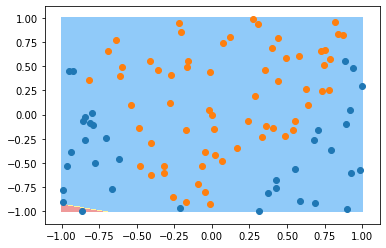

In [17]:
np.random.seed(666)
X = np.random.uniform(-1, 1, 200).reshape((-1, 2))

y = np.array(X[:, 1] - 2 * X[:, 0] ** 2 + 1 > 0, dtype='int')
random_choice = np.random.choice(len(y), int(len(y) * 0.05), replace=False)
twoLayerNet = TwoLayerNet(2, 2, 2)
twoLayerNet.fit(X, y)

plot_decision_boundary(twoLayerNet, (-1, 1, -1, 1))
plt.scatter(X[y == 0, 0], X[y == 0, 1])
plt.scatter(X[y == 1, 0], X[y == 1, 1])
plt.show()